In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
import time
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [6]:
# Set the main variables
N = 100 # Ensemble size
n = 100000 # Number of temperature steps

### Problem 2a

Time:216.16827058792114


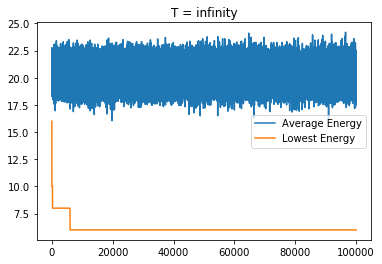

In [7]:
start = time.time()
temps = np.repeat(np.inf,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSF = anl.run(N)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSF,label='Lowest Energy')
plt.legend()
plt.title('T = infinity')
plt.savefig('plots/problem2a_bin.png')
print('Time:' + str(time.time()-start))

### Problem 2b

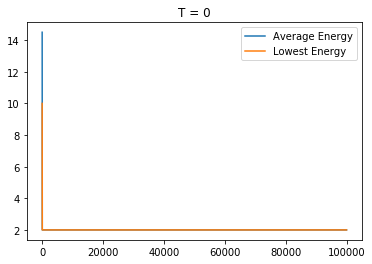

In [4]:
temps = np.repeat(0,n)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(N)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSFArr,label='Lowest Energy')
plt.legend()
plt.title('T = 0')
plt.savefig('plots/problem2b.png')

### Problem 2c

In [ ]:
temps = np.linspace(0,n,n)
b = -np.max(temps)/np.log(0.5/40)
temps = 40*np.exp(-temps/b)
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2c.png')

### Problem 2d

In [ ]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.max(temps))
temps = 40/(1+b*temps)
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2d.png')

### Problem 2e

0
1
2
3
4
5
6
7
8
9
 
*** Profile stats marshalled to file '/tmp/tmpls0g0h8j'. 


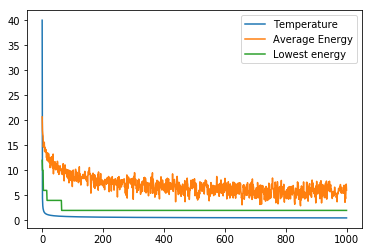

In [5]:
temps = np.linspace(0,n,n)
b = 39.5/(0.5*np.log(np.max(temps)+1))
temps = 40/(1+b*np.log(temps+1))
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
%snakeviz energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2e.png')